# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator
from sklearn.metrics import silhouette_score

# Read Dataset

In [8]:
df=pd.read_csv('C:\\Users\\SOFT\\Desktop\\Machine learning tasks\\Collegeupdated.csv')
df

,Unnamed: 0,Enroll,Top10perc,Top25perc,Books,PhD,Grad.Rate
0,Abilene Christian University,721,23,52,450,70,60
1,Adelphi University,512,16,29,750,29,56
2,Adrian College,336,22,50,400,53,54
3,Agnes Scott College,137,60,89,450,92,59
4,Alaska Pacific University,55,16,44,800,76,15
...,...,...,...,...,...,...,...
95,Cazenovia College,527,9,35,600,22,118
96,Cedar Crest College,198,25,58,500,58,74
97,Cedarville College,616,25,55,570,50,64
98,Centenary College,90,12,46,500,41,24


In [9]:
df = df.drop('Unnamed: 0',axis=1)

In [10]:
df

,Enroll,Top10perc,Top25perc,Books,PhD,Grad.Rate
0,721,23,52,450,70,60
1,512,16,29,750,29,56
2,336,22,50,400,53,54
3,137,60,89,450,92,59
4,55,16,44,800,76,15
...,...,...,...,...,...,...
95,527,9,35,600,22,118
96,198,25,58,500,58,74
97,616,25,55,570,50,64
98,90,12,46,500,41,24


# preprocessing 

In [11]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df


array([[ 0.11288452, -0.31441545, -0.22106424, -0.46550889, -0.04563733,
        -0.30600125],
       [-0.14434253, -0.70603611, -1.42306839,  0.88235972, -2.44452247,
        -0.54003662],
       [-0.36095478, -0.37036126, -0.32558634, -0.69015366, -1.04029702,
        -0.65705431],
       [-0.60587431,  1.75557949,  1.71259461, -0.46550889,  1.24156934,
        -0.36451009],
       [-0.70679592, -0.70603611, -0.63915264,  1.10700449,  0.30541904,
        -2.93889918],
       [-0.58002853,  0.52477169,  0.30154626, -0.24086412, -0.22116551,
        -0.59854546],
       [-0.64771986, -0.6500903 , -0.58689159, -0.24086412,  1.12455055,
        -0.13047472],
       [-0.17264981,  0.46882588,  0.61511256, -0.46550889,  1.06604115,
         0.45461371],
       [-0.49510668,  0.07720522,  0.35380731, -1.13944319,  0.48094722,
         0.86417561],
       [-0.56279801, -0.42630707, -0.63915264,  0.47799914, -1.80091914,
        -0.77407199],
       [-0.19357258,  0.46882588,  0.98093991, -0.

# Visualize two features 

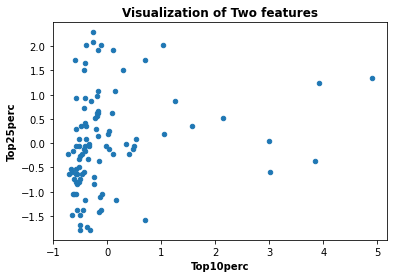

In [12]:
plt.scatter(scaled_df[:, 0], scaled_df[:,2], s=20);
plt.title('Visualization of Two features', fontweight='bold')
plt.xlabel("Top10perc",fontweight='bold')
plt.ylabel("Top25perc",fontweight='bold')
plt.show()

# K-means algorithm

In [13]:
# A list holds the SSE values for each K

sse = [] #SUM OF SQUARED ERROR
for k in range(1,11):
    km = KMeans(n_clusters=k , random_state=42)
    km.fit(scaled_df)
    sse.append(km.inertia_)

C:\Users\SOFT\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [14]:
sse

[599.9999999999999,
 416.836340686916,
 340.17951092292776,
 275.0841838632542,
 225.57998698902878,
 201.20565392058637,
 178.8937540993914,
 170.761653395306,
 157.06068896979534,
 147.45854115404688]

In [15]:
# The lowest SSE value
km.inertia_

147.45854115404688

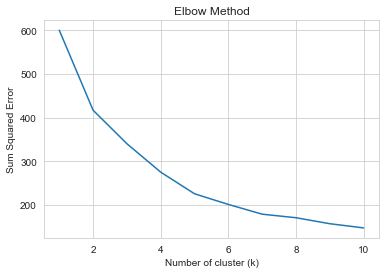

In [16]:
sns.set_style("whitegrid")
g=sns.lineplot(x=range(1,11), y=sse)
  
g.set(xlabel ="Number of cluster (k)", 
      ylabel = "Sum Squared Error", 
      title ='Elbow Method')
  
plt.show()

In [17]:
kmeans=KMeans(n_clusters=4 , random_state=42)
kmeans.fit(scaled_df)

KMeans(n_clusters=4, random_state=42)

In [18]:
# The lowest SSE value
kmeans.inertia_

275.0841838632542

In [19]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[-0.1912576 , -0.07464769,  0.09996792, -0.27573755,  0.35974919,
         0.31948614],
       [-0.03168143,  2.05682615,  1.80505647,  0.38468516,  1.16505705,
         1.09821098],
       [ 2.82699908,  0.26602232,  0.3930031 ,  1.13340025,  0.45169252,
        -0.12316111],
       [-0.38300851, -0.69545177, -0.83265977, -0.06721979, -0.91537156,
        -0.72188843]])

In [20]:
# The number of iterations required to converge
kmeans.n_iter_

5

In [21]:
pred = kmeans.fit_predict(scaled_df)
pred

array([0, 3, 3, 1, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 3, 1, 3, 3, 3, 3, 0,
       3, 2, 0, 3, 0, 2, 3, 0, 0, 0, 3, 3, 0, 3, 1, 1, 0, 2, 0, 0, 3, 3,
       0, 3, 3, 3, 0, 0, 3, 3, 3, 3, 1, 0, 0, 3, 0, 2, 1, 2, 3, 2, 1, 3,
       3, 3, 0, 2, 1, 1, 1, 0, 0, 3, 0, 0, 2, 0, 0, 0, 3, 0, 0, 3, 1, 1,
       0, 0, 0, 1, 0, 3, 0, 3, 0, 3, 3, 0])

In [22]:
# number of points in each cluster 
frame = pd.DataFrame(scaled_df)
frame['cluster'] = pred
frame['cluster'].value_counts()

0    42
3    37
1    13
2     8
Name: cluster, dtype: int64

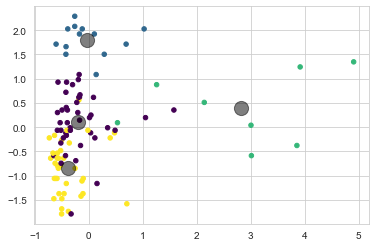

In [23]:
plt.scatter(scaled_df[:, 0], scaled_df[:, 2], c=pred, s=20, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 2], c='black', s=200, alpha=0.5);

In [24]:
silhouette_score(scaled_df,pred)

0.2639801240934691